<a href="https://colab.research.google.com/github/AtreyaBandyopadhyay/NLP-with-Disaster-Tweets/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.options.display.max_colwidth = 100


In [ ]:
dataset = pd.read_csv("./drive/MyDrive/Disaster Tweet Twitter/Dataset/train.csv")

# EDA

## 1. Analysing class distribution

In [ ]:
#distribution of classes
classCounts = 100*dataset.value_counts("target")/len(dataset)
classes = list(classCounts.index)
counts = list(classCounts.values)
fig = px.bar(x=classes,y=counts,title="Class Distribution")
fig.update_xaxes(title="Target")
fig.update_yaxes(title="Percentage")



**Observation:** There is no class imbalance

## 2. Analysing missing values

In [ ]:
dataset.isna().mean()*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

**Observations:**

1.   Location has missing values for 33% of the entries.
2.   Keyword has missing values for 0.8% of entries.



## 3 Analysing keyword features.

### 3.1 Analysing for positive classes

In [ ]:
keywordXPercentage_1_df = pd.DataFrame(dataset[dataset['target']==1].keyword.value_counts()*100/dataset[dataset['target']==1].keyword.value_counts().sum()).rename({"keyword":"Percentage"},axis=1)

In [ ]:
fig = px.bar(keywordXPercentage_1_df, x=keywordXPercentage_1_df.index, y='Percentage')
fig.show()

### 3.2 Analysing for negative classes

In [ ]:
keywordXPercentage_0_df = pd.DataFrame(dataset[dataset['target']==0].keyword.value_counts()/dataset[dataset['target']==0].keyword.value_counts().sum()*100).rename({"keyword":"Percentage"},axis=1)

In [ ]:
fig = px.bar(keywordXPercentage_0_df, x=keywordXPercentage_0_df.index, y='Percentage')
fig.show()

**Observation:** Both positive and negative classes have words that can indicate disaster.

## 4 Analyzing locations

In [ ]:
#source: https://github.com/Tek-nr/Disaster-Tweet-Detection/blob/main/DisasterTweetsClassifier.ipynb
dataset['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)


### 4.1 Analyzing locations for both positive and negative classes

### 4.1 Analyzing locations for positive classes

In [ ]:
locationXPercentage_1_df = pd.DataFrame(dataset[dataset['target']==1].location.value_counts()[:5]*100/len(dataset)).rename({"location":"Percentage"},axis=1)

In [ ]:
fig = px.bar(locationXPercentage_1_df, x=locationXPercentage_1_df.index, y='Percentage')
fig.show()

### 4.2 Analyzing locations for negative classes

In [ ]:
locationXPercentage_0_df = pd.DataFrame(dataset[dataset['target']==1].location.value_counts()[:5]*100/len(dataset)).rename({"location":"Percentage"},axis=1)

In [ ]:
fig = px.bar(locationXPercentage_0_df, x=locationXPercentage_0_df.index, y='Percentage')
fig.show()

**Observation:** No noticable difference between positive and negative classes.

### 5 Analyzing word distribution on reviews

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
stopwords.add('https')

In [ ]:
def generate_word_cloud(text,stopwords):
  comment_words = ''
  for val in text:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

In [ ]:
def words_with_top_tf_idf(corpus,top_k,stopwords):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(corpus).toarray()
  all_text=[sentence for sentence in dataset.text.str.lower().str.split()]
  resultList = sum(all_text, [])
  resultList=list(set(resultList).difference(stopwords))
  result_transformed=vectorizer.transform(resultList).toarray().sum(axis=0)
  importance = np.argsort(result_transformed)
  print(result_transformed.shape)
  tfidf_feature_names = np.array(vectorizer.get_feature_names_out())
  return tfidf_feature_names[importance[:top_k]]

### 5.1 Word distribution for positive classes

In [ ]:
words_with_top_tf_idf(dataset[dataset['target']==1].text,40,list(stopwords))

(11498,)


array(['once', 'haven', 'having', 'himself', 'each', 'during', 'any',
       'cannot', 'yourselves', 'hasn', 'against', 'further', 'which',
       'under', 'therefore', '309943', 'indiahttp', 'informationng',
       'xrrlnhelap', 'avalanches', 'stormy', '77ciwxabva', 'û_t',
       'pnpizody', '172', 'û_https', '64cymg1ltg', 'quantit', 'noonan',
       '6773', 'heartbreak', '267', 'longevity', '208', 'cindynoonan',
       'ln', 'yellowstone', 'bf', 'airplaneåê', 'ecology'], dtype=object)

### 5.2 Word distribution for negative classes

In [ ]:
words_with_top_tf_idf(dataset[dataset['target']==0].text,40,list(stopwords))

(14278,)


array(['once', 'shall', 'yourselves', 'any', 'during', 'under', 'further',
       'nor', 'however', 'themselves', 'himself', 'which', 'having',
       'haven', 'hasn', 'cannot', 'each', 'against', 'hadn', 'doing',
       'below', 'milf', 'mason', 'rockefelleruniv', 'noonan', '877',
       'rockefeller_chi', '905', 'richelieu', '8591', 'kebab',
       'heartbreak', 'pickles', 'tahini', 'cindynoonan', 'laurent',
       'heiress', 'blazer', 'wineisdumb', 'fuckface'], dtype=object)

More analysis needed.

## 6. Sentence Length Analysis

In [ ]:
dataset["sentence_length"] = dataset.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
dataset["sentence_length"].describe()

count    7613.000000
mean       18.916327
std         6.872150
min         1.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        72.000000
Name: sentence_length, dtype: float64

In [ ]:
fig=px.box(dataset,y="sentence_length",x="target",points="all")
fig.show()

**Observation:** Positive classes have greater median length of sentences. But the difference is negligible.

## 7. Analysing words with all capital letters.

In [ ]:
def number_of_cap_words(str):
  words = nltk.word_tokenize(str)
  num_cap_words=0

  for word in words:
    if word.upper()==word:
      num_cap_words=num_cap_words+1

  return num_cap_words


In [ ]:
dataset["number_of_cap_words"] = dataset["text"].apply(lambda x: number_of_cap_words(x))

In [ ]:
dataset["number_of_cap_words"].describe()

count    7613.000000
mean        4.593196
std         3.854949
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        69.000000
Name: number_of_cap_words, dtype: float64

In [ ]:
fig=px.box(dataset,y="number_of_cap_words",x="target",points="all")
fig.show()

**Observation:** No clear distinction between two classes based on number of capital words.

## 8. Analyzing URLS

## 8.1 Analyzing number of URLS

In [ ]:
dataset['num_URL'] = dataset['text'].apply(lambda x: len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', x)))

In [ ]:
dataset['num_URL'].describe()

count    7613.000000
mean        0.620123
std         0.663930
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: num_URL, dtype: float64

In [ ]:
fig=px.box(dataset,y="num_URL",x="target",points="all")
fig.show()

**Observation:** No significant difference on URL couns between two classes.

## 8.2 Analyzing presense or absense of URL

In [ ]:
def has_URL(text):
  if "http" in text:
    return 1
  else:
    return 0


In [ ]:
dataset["has_URL"] = dataset.text.apply(lambda x:has_URL(x))

In [ ]:
#positive example having URLS
100*dataset[dataset["target"]==1]["has_URL"].sum()/len(dataset)

28.530145803231314

In [ ]:
#negative examples having URLS
100*dataset[dataset["target"]==0]["has_URL"].sum()/len(dataset)

23.630631814002363

**Observation:** Number of examples with URL is 5% more in positive class than in negative class.

## 9. Analyzing hashtags

### 9.1 Analyzing number of Hashtags

In [ ]:
dataset['num_hashtag'] = dataset['text'].apply(lambda x: len(re.findall(r"#(\w+)",x)))

In [ ]:
dataset[dataset['target']==0]['num_hashtag'].describe()

count    4342.000000
mean        0.388761
std         1.002390
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: num_hashtag, dtype: float64

In [ ]:
dataset[dataset['target']==1]['num_hashtag'].describe()

count    3271.000000
mean        0.501987
std         1.184215
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        13.000000
Name: num_hashtag, dtype: float64

In [ ]:
fig=px.box(dataset,y="num_hashtag",x="target",points="all")
fig.show()

**Observations:** Positive class have significant higher hashtags than negative class.

### 9.2 Analyzing presense or absense of Hashtags

In [ ]:
dataset['has_hashtags'] = dataset['num_hashtag'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
#for negative class
100*dataset[dataset['target']==0]['has_hashtags'].sum()/len(dataset)

11.624852226454749

In [ ]:
#for positive class
100*dataset[dataset['target']==1]['has_hashtags'].sum()/len(dataset)

11.270195717851044

**Observations:** No significant difference between positive and negative classes.

### 9.3 Analyzing common Hashtags

In [ ]:
dataset['hashtags'] = dataset['text'].apply(lambda x: re.findall(r"#(\w+)",x))

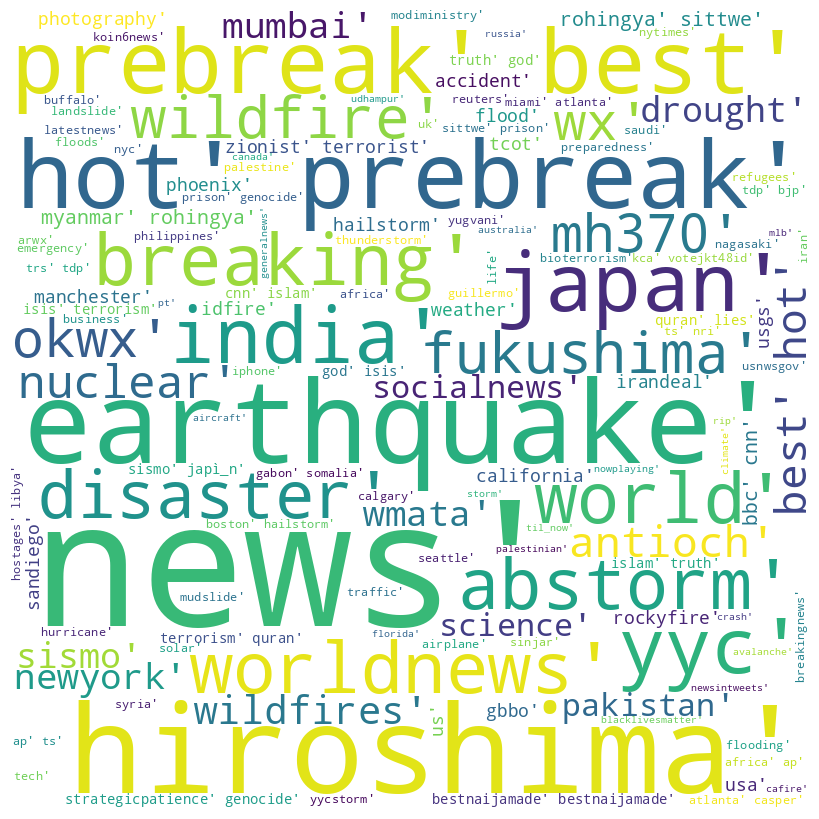

In [ ]:
#Word cloud for positive classes
generate_word_cloud(dataset[dataset['target']==1]['hashtags'],stopwords)

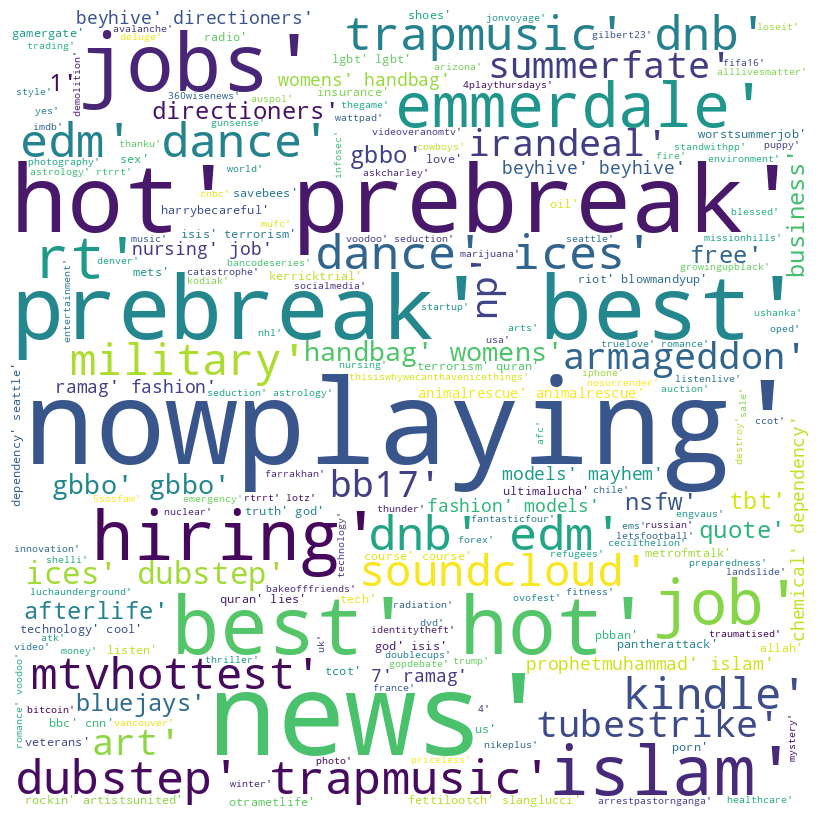

In [ ]:
#Word cloud for positive classes
generate_word_cloud(dataset[dataset['target']==0]['hashtags'],stopwords)

**Observations:** Hashtags for positive classes generally corresnponds to disaster indicating words like wildfire, earthquake etc.

## 10. Analyzing mentions

### 10.1 Analyzing number of mentions

In [ ]:
dataset['num_mention'] = dataset['text'].apply(lambda x: len(re.findall(r"@(\w+)", x)))

In [ ]:
dataset[dataset['target']==0]['num_mention'].describe()

count    4342.000000
mean        0.420313
std         0.769424
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: num_mention, dtype: float64

In [ ]:
dataset[dataset['target']==1]['num_mention'].describe()

count    3271.000000
mean        0.272088
std         0.624632
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: num_mention, dtype: float64

In [ ]:
fig=px.box(dataset,y="num_mention",x="target",points="all")
fig.show()

**Observation:** Negative classes have significantly more mentions than positive classes.

### 10.2 Analyzing presense of absense of mentions

In [ ]:
dataset['has_mentions'] = dataset['num_mention'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
#for negative class
100*dataset[dataset['target']==0]['has_mentions'].sum()/len(dataset)

17.640877446473137

In [ ]:
#for positive class
100*dataset[dataset['target']==1]['has_mentions'].sum()/len(dataset)

8.748193878891371

**Observation:** Negative class have significantly higher percentage of mentions than positive class.

### 10.3 Analyzing common mentions.

In [ ]:
dataset['mentions'] = dataset['text'].apply(lambda x: re.findall(r"@(\w+)", x))

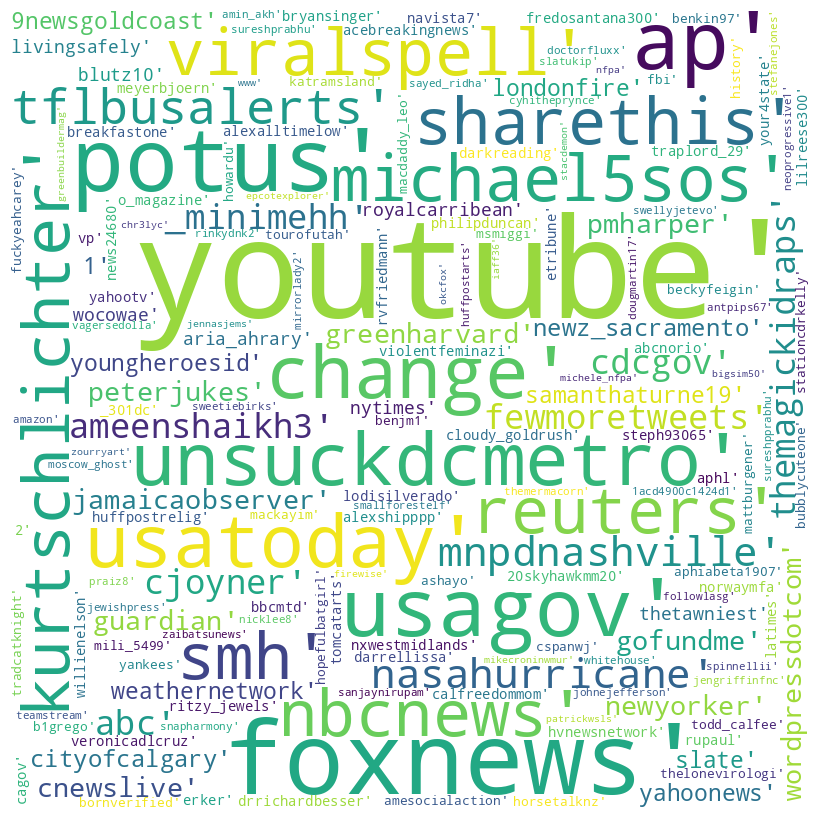

In [ ]:
#Word cloud for positive classes
generate_word_cloud(dataset[dataset['target']==1]['mentions'],stopwords)

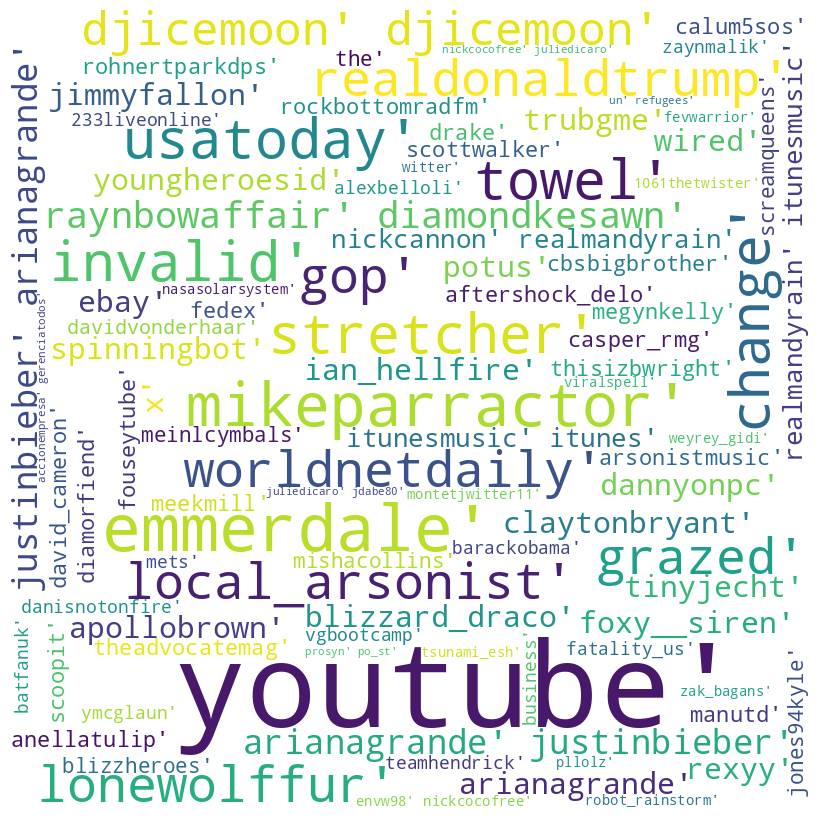

In [ ]:
#Word cloud for positive classes
generate_word_cloud(dataset[dataset['target']==0]['mentions'],stopwords)

**Observations:** News outlets or goverment websites are commonly mentioned in positive classes. Many of the mentions like @batfanuk , @anellatulip have no semantic meaning.

## 11. Analyzing Emoticons

In [ ]:
list_of_emojis = [':-o',':-)',':-(',':-D',';-)',':D']

### 11.1 Analyzing number of emojis

In [ ]:
def num_emoji(text):
  num = 0
  for emojis in list_of_emojis:
      if emojis in text:
          num = num+1
  return num

In [ ]:
dataset['num_emoji'] = dataset['text'].apply(lambda x: num_emoji(x))

In [ ]:
dataset[dataset['target']==0]['num_emoji'].describe()

count    4342.000000
mean        0.003685
std         0.060599
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: num_emoji, dtype: float64

In [ ]:
dataset[dataset['target']==1]['num_emoji'].describe()

count    3271.000000
mean        0.000611
std         0.024723
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: num_emoji, dtype: float64

In [ ]:
fig = px.box(dataset,y="num_emoji",x="target",points="all")
fig.show()

**Observation:** No significant difference between both the classes.

11.2 Analyzing presense or absense of emojis

In [ ]:
dataset['has_emoji'] = dataset['num_emoji'].apply(lambda x:1 if x>0 else 0)

In [ ]:
#for positive class
100*dataset[dataset['target']==0]['has_emoji'].sum()/len(dataset)

0.21016681991330619

In [ ]:
#for negative class
100*dataset[dataset['target']==1]['has_emoji'].sum()/len(dataset)

0.026270852489163273

**Observation:** Positive classes have signigicantly more datapoints with emojis than negative classes.